Final weights: [10.          0.3256664  -0.46047619 ... -0.05        0.
 -0.1       ]
Number of epochs: 999


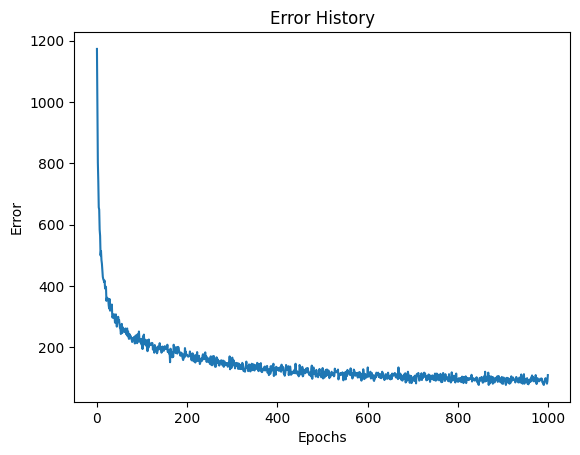

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def step_activation(net_input):
    """
    Implements the step activation function.

    Args:
      net_input: The net input to the neuron.

    Returns:
      The output of the activation function.
    """
    return 1 if net_input >= 0 else 0

def train_perceptron(X, y, learning_rate=0.05, max_epochs=1000, error_threshold=0.002):
    """
    Trains a perceptron using the given training data.

    Args:
      X: The input data.
      y: The target output.
      learning_rate: The learning rate.
      max_epochs: The maximum number of epochs.
      error_threshold: The error threshold for convergence.

    Returns:
      The trained perceptron weights and the number of epochs.
    """
    num_features = X.shape[1]
    weights = np.array([10, 0.2, -0.75] + [0] * (num_features - 3))  # Adjust weights array size

    error_history = []
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            net_input = np.dot(weights, X[i])  # No bias term; weights include bias
            predicted_output = step_activation(net_input)
            error = y[i] - predicted_output
            total_error += error ** 2
            weights += learning_rate * error * X[i]  # Update weights including bias adjustment
        error_history.append(total_error)
        if total_error <= error_threshold:
            break

    return weights, error_history, epoch

def plot_error_history(error_history):
    """
    Plots the error history during training.

    Args:
      error_history: The list of errors at each epoch.
    """
    plt.plot(range(len(error_history)), error_history)
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title("Error History")
    plt.show()

def load_and_prepare_data():
    """
    Load dataset and convert text data to TF-IDF features.
    """
    df = pd.read_excel('Book1.xlsx')

    # Convert text columns to TF-IDF features
    vectorizer_english = TfidfVectorizer()
    vectorizer_hindi = TfidfVectorizer()

    english_features = vectorizer_english.fit_transform(df['ENGLISH']).toarray()
    hindi_features = vectorizer_hindi.fit_transform(df['HINDI']).toarray()

    # Combine both English and Hindi TF-IDF features
    combined_features = np.hstack((english_features, hindi_features))

    # Add bias term (1s) to the features matrix
    bias_term = np.ones((combined_features.shape[0], 1))
    combined_features_with_bias = np.hstack((combined_features, bias_term))

    # Create labels (0s and 1s)
    labels = np.array([0] * (len(combined_features_with_bias) // 2) + [1] * (len(combined_features_with_bias) - len(combined_features_with_bias) // 2))
    np.random.shuffle(labels)

    return combined_features_with_bias, labels

def main():
    # Load and prepare data
    feature_data, label_data = load_and_prepare_data()

    # Split the data into training and test sets
    train_features, test_features, train_labels, test_labels = train_test_split(
        feature_data, label_data, test_size=0.2, random_state=42
    )

    # Train the perceptron with initial weights
    weights, error_history, epochs = train_perceptron(train_features, train_labels)

    # Print the results
    print("Final weights:", weights)
    print("Number of epochs:", epochs)

    # Plot the error history
    plot_error_history(error_history)

if __name__ == "__main__":
    main()
